# Pittsburgh's Best Neighborhood... For Burglars?

## Introduction

Using a dataset from the WPRDC, I have decided on the following metric to base my search for the best neighborhood on:

**Metric:** Nonfamily, lone owner households

We don't want to be the type of burglar stealing children's toys, do we? Aside from that, nonfamily households with only one person occupying them will likely be the most vulnerable, since the chance of someone being inside of them at any given moment is the lowest. Nonfamily households also could potentially hold more high value items in them because the owner does not have to spend money on children.

### Households

In [3]:
# imports
import pandas as pd
import csv
from matplotlib import pyplot as plt

In [4]:
# A sample from all of the household types data 
types = pd.read_csv("household-type.csv")
types.head(10)

,Neighborhood,Id,Estimate; Total:,Margin of Error; Total:,Estimate; Family households:,Margin of Error; Family households:,Estimate; Family households: - Married-couple family,Margin of Error; Family households: - Married-couple family,Estimate; Family households: - Other family:,Margin of Error; Family households: - Other family:,"Estimate; Family households: - Other family: - Male householder, no wife present","Margin of Error; Family households: - Other family: - Male householder, no wife present","Estimate; Family households: - Other family: - Female householder, no husband present","Margin of Error; Family households: - Other family: - Female householder, no husband present",Estimate; Nonfamily households:,Margin of Error; Nonfamily households:,Estimate; Nonfamily households: - Householder living alone,Margin of Error; Nonfamily households: - Householder living alone,Estimate; Nonfamily households: - Householder not living alone,Margin of Error; Nonfamily households: - Householder not living alone
0,Allegheny Center,1,870,93.000000,184,59.000000,128,51.000000,56,35.000000,0,10.000000,56,35.000000,686,79.000000,529,81.000000,157,53.000000
1,Allegheny West,2,146,36.000000,70,32.000000,66,32.000000,4,7.000000,4,7.000000,0,10.000000,76,29.000000,61,25.000000,15,15.000000
2,Allentown,3,1069,132.457540,622,130.234404,175,63.584589,447,134.718224,16,23.685439,431,133.360414,447,106.386089,383,101.710373,64,50.249378
3,Arlington,4,701,104.465305,394,78.319857,230,59.514704,164,61.302529,44,31.764760,120,54.726593,307,78.568442,180,56.151581,127,55.668663
4,Arlington Heights,5,144,59.000000,86,62.000000,0,10.000000,86,62.000000,0,10.000000,86,62.000000,58,33.000000,58,33.000000,0,10.000000
5,Banksville,6,1946,229.222599,913,174.421902,712,158.682072,201,109.325203,104,90.271812,97,65.939366,1033,198.123699,926,209.098063,107,64.961527
6,Bedford Dwellings,7,723,53.000000,342,78.000000,63,37.000000,279,74.000000,50,27.000000,229,69.000000,381,70.000000,348,65.000000,33,24.000000
7,Beechview,8,3567,258.027130,1929,213.356509,1145,161.718892,784,162.453070,193,87.109127,591,141.513250,1638,232.340268,1291,199.612124,347,128.852629
8,Beltzhoover,9,848,156.057682,379,102.601170,169,87.412814,210,75.557925,31,32.449961,179,71.168813,469,138.285936,411,130.311166,58,57.262553
9,Bloomfield,10,4571,205.494526,1281,138.028983,852,105.052368,429,101.508620,141,68.738635,288,78.974679,3290,209.804671,2254,189.348884,1036,145.904078


First, I pulled the first ten data points to give an idea of the data.

In [5]:
# Data filtered to only nonfamily, lone households
fdata = types[['Neighborhood','Estimate; Nonfamily households: - Householder living alone']]
fdata

,Neighborhood,Estimate; Nonfamily households: - Householder living alone
0,Allegheny Center,529
1,Allegheny West,61
2,Allentown,383
3,Arlington,180
4,Arlington Heights,58
...,...,...
86,Upper Lawrenceville,515
87,West End,39
88,West Oakland,261
89,Westwood,526


Next, I filtered the data down to only display nonfamily households in which the householder lives alone.

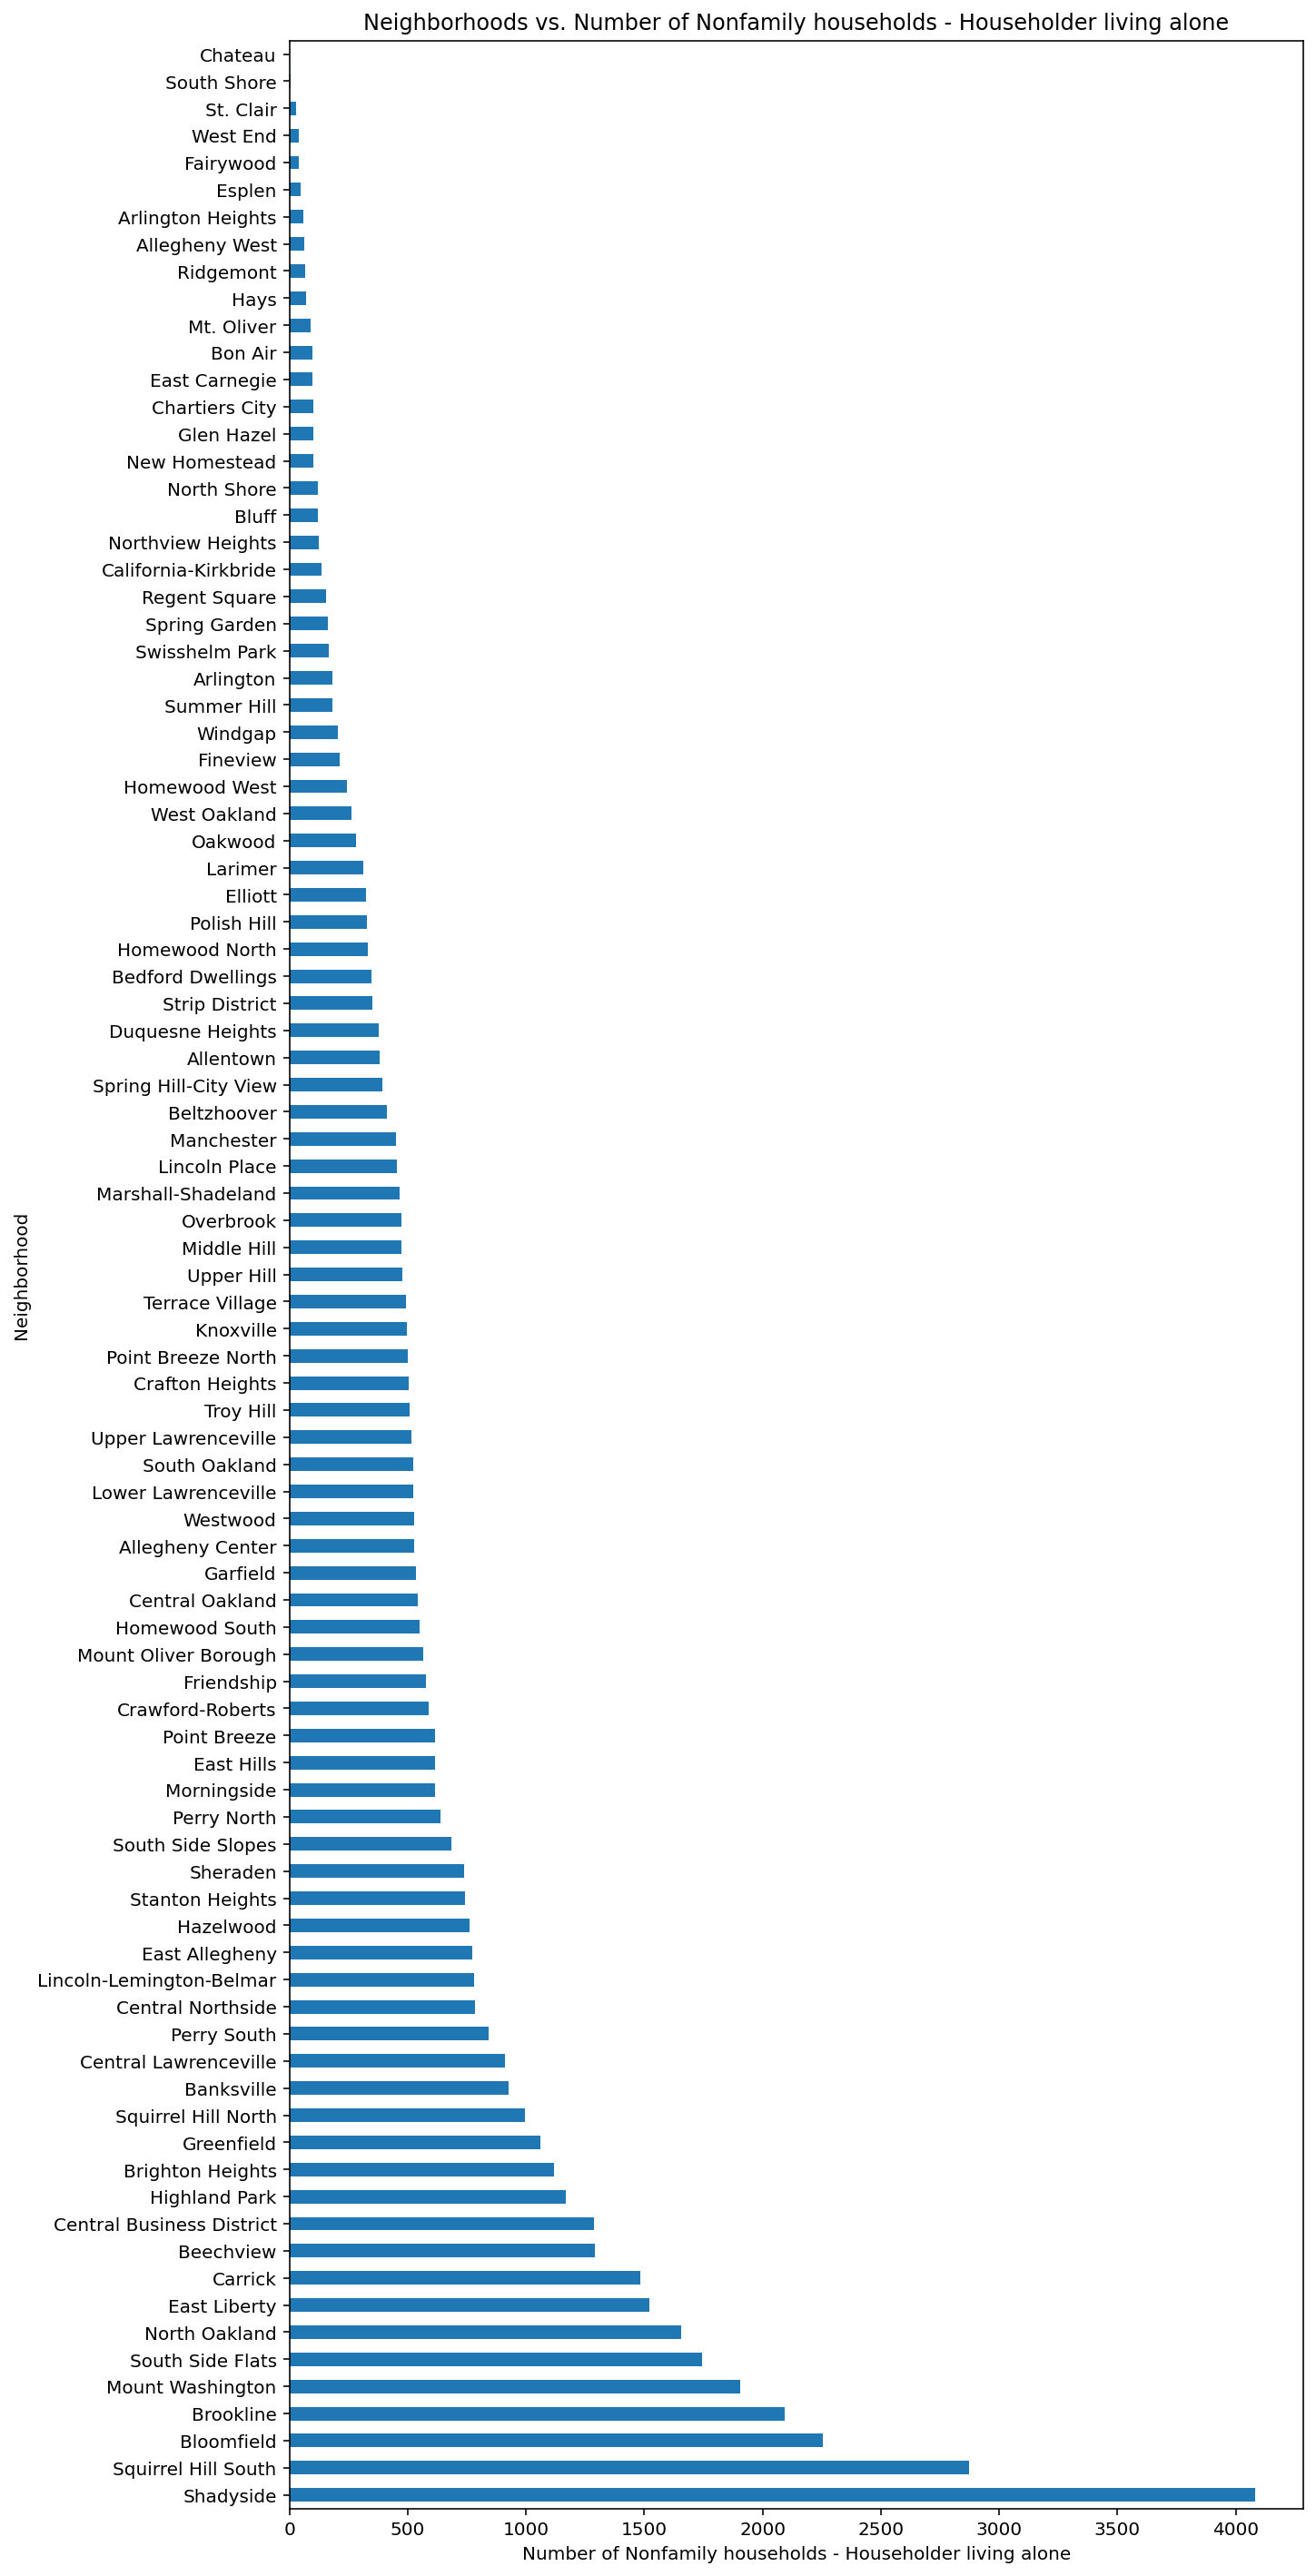

In [7]:
# Bar graph represetation
sort = types.sort_values(by=['Estimate; Nonfamily households: - Householder living alone'], ascending=False)
fdata_graph = sort.plot.barh(x="Neighborhood",y='Estimate; Nonfamily households: - Householder living alone', legend=None)
fdata_graph.set_xlabel("Number of Nonfamily households - Householder living alone")
fdata_graph.set_ylabel("Neighborhood")
fdata_graph.set_title("Neighborhoods vs. Number of Nonfamily households - Householder living alone")

plt.rcParams["figure.figsize"] = [10, 25]
%config InlineBackend.figure_format = 'retina'

In [8]:
# Finding the mean to further filter out the results
fdata.describe()

,Estimate; Nonfamily households: - Householder living alone
count,91.000000
mean,608.186813
std,652.127679
min,3.000000
25%,173.000000
50%,477.000000
75%,739.000000
max,4080.000000


I found that the 75th percentile is 739 nonfamily, lone households.

In [9]:
# Taking out all neighborhoods less than the 75th percentile 
top25 = types[types['Estimate; Nonfamily households: - Householder living alone'] > 739]

# Filtering to just nonfamily lone households again
top25Filter = top25[['Neighborhood','Estimate; Nonfamily households: - Householder living alone']]
top25Filter

,Neighborhood,Estimate; Nonfamily households: - Householder living alone
5,Banksville,926
7,Beechview,1291
9,Bloomfield,2254
12,Brighton Heights,1119
13,Brookline,2093
15,Carrick,1484
16,Central Business District,1286
17,Central Lawrenceville,911
18,Central Northside,785
25,East Allegheny,772


This is the data brought down to just the top 25th percentile. So, it is the top 25% of neighborhoods.

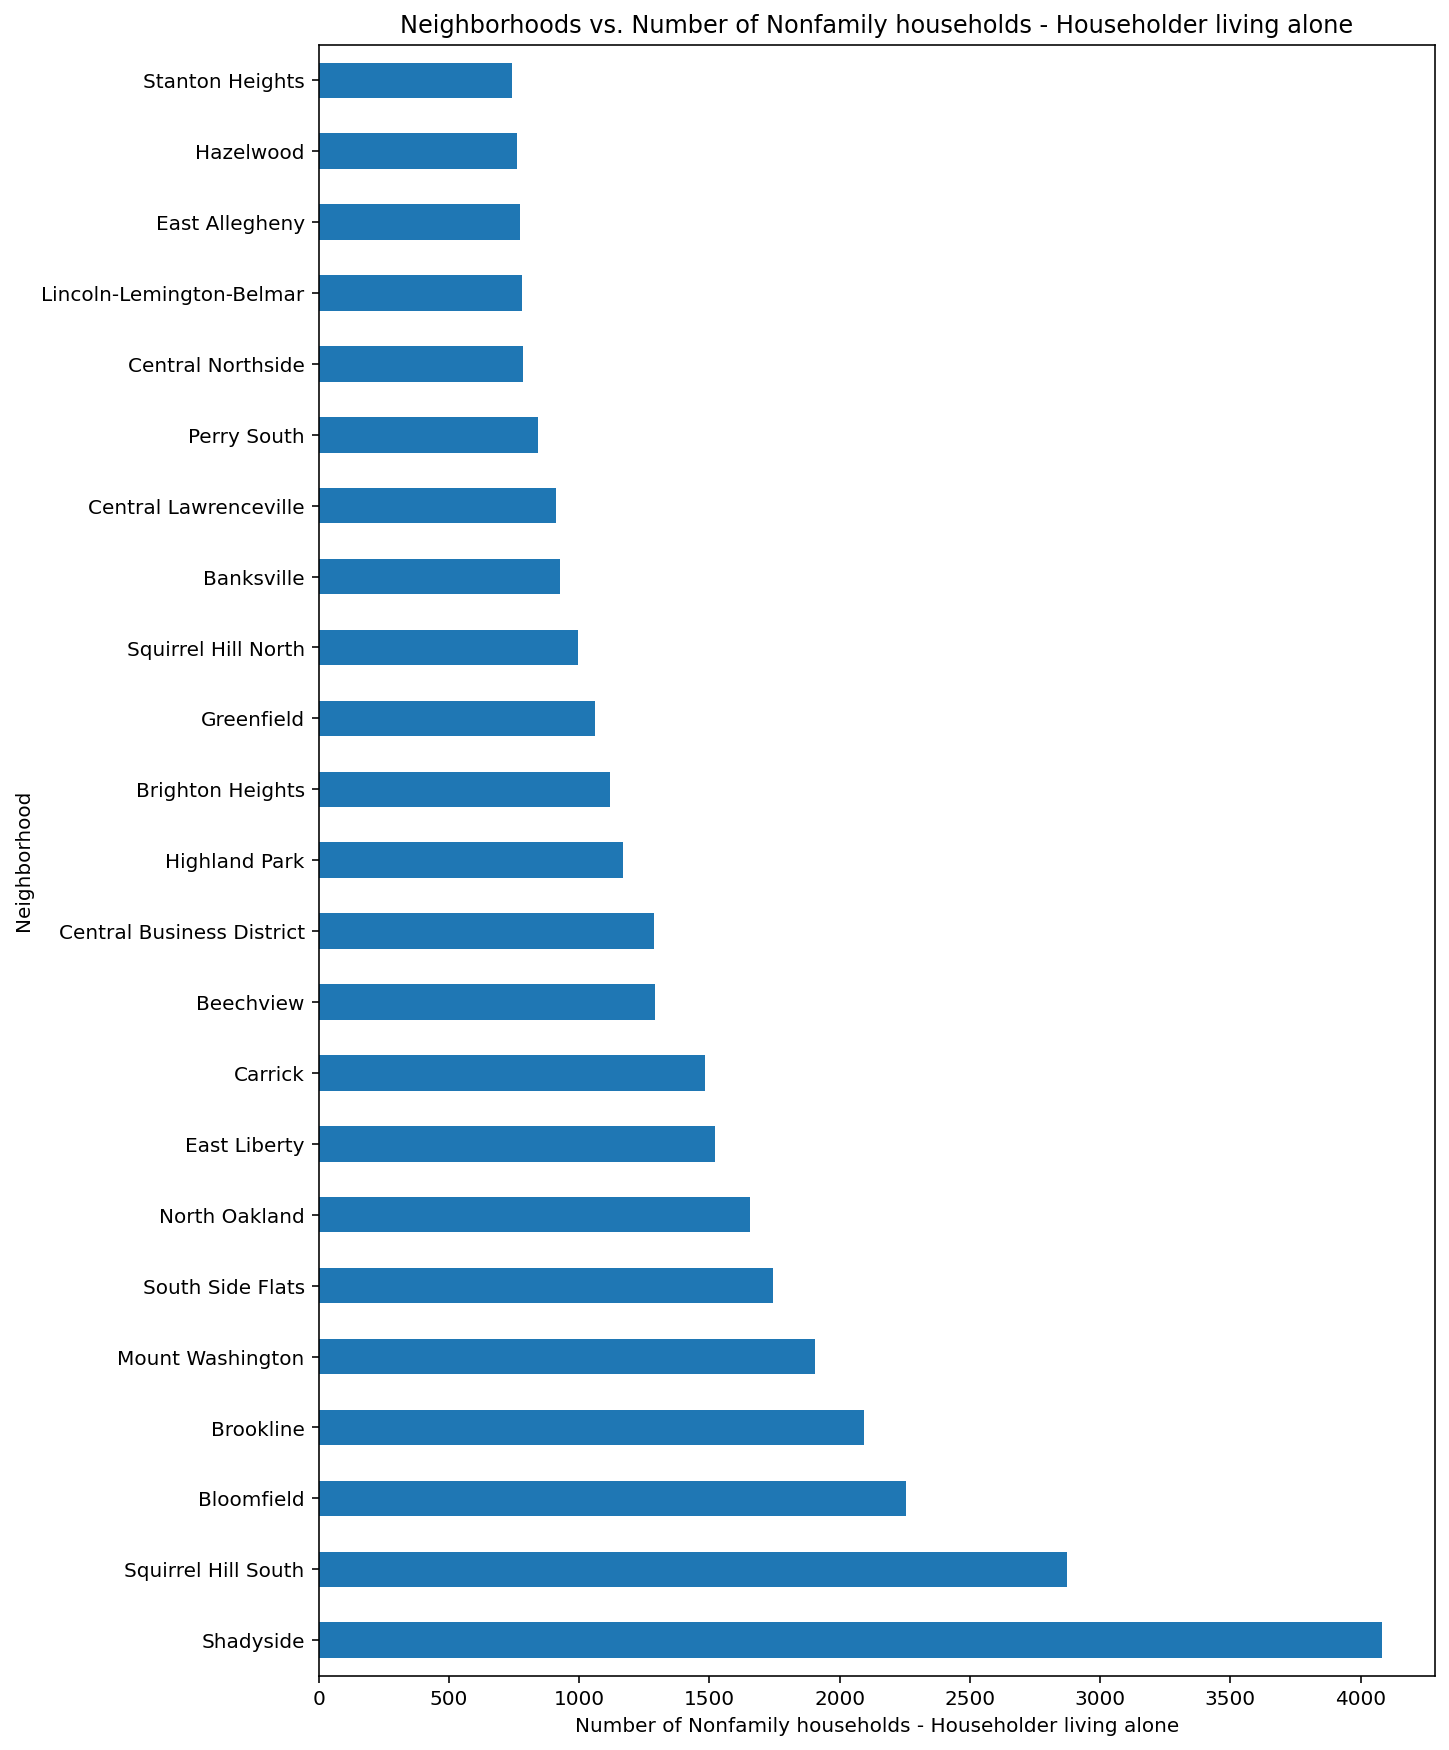

In [11]:
# Bar graph representation
sort2 = top25Filter.sort_values(by=['Estimate; Nonfamily households: - Householder living alone'], ascending=False)
graph2 = sort2.plot.barh(x="Neighborhood",y='Estimate; Nonfamily households: - Householder living alone', legend=None)
graph2.set_xlabel("Number of Nonfamily households - Householder living alone")
graph2.set_ylabel("Neighborhood")
graph2.set_title("Neighborhoods vs. Number of Nonfamily households - Householder living alone")

plt.rcParams["figure.figsize"] = [10, 15]
%config InlineBackend.figure_format = 'retina'

In [12]:
# Data frame of the csv for manipulation
df = pd.DataFrame(types, columns = ['Neighborhood', 'Estimate; Nonfamily households: - Householder living alone', 'Estimate; Total:']) 

# Creation of series of the proportion of nonfamily, lone householders vs total number of households in a neighborhood
prop = []
for ind in df.index: 
    prop.append(df['Estimate; Nonfamily households: - Householder living alone'][ind]/df['Estimate; Total:'][ind])

# Creation of series of neighborhoods
hoods = []
for ind in df.index: 
    hoods.append(df['Neighborhood'][ind])

ndf = pd.DataFrame({"Neighborhood": hoods, "Nonfamily households - Householder living alone" : prop})

Here, I am creating a new data frame to be able to calculate the proportions of nonfamily, lone households to total households in each neighborhood. This is to give a different perspective on the data.

In [13]:
# Displaying the data for proportion of nonfamily, lone households vs. total households in a neighborhood
ndf

,Neighborhood,Nonfamily households - Householder living alone
0,Allegheny Center,0.608046
1,Allegheny West,0.417808
2,Allentown,0.358279
3,Arlington,0.256776
4,Arlington Heights,0.402778
...,...,...
86,Upper Lawrenceville,0.400155
87,West End,0.393939
88,West Oakland,0.414286
89,Westwood,0.352547


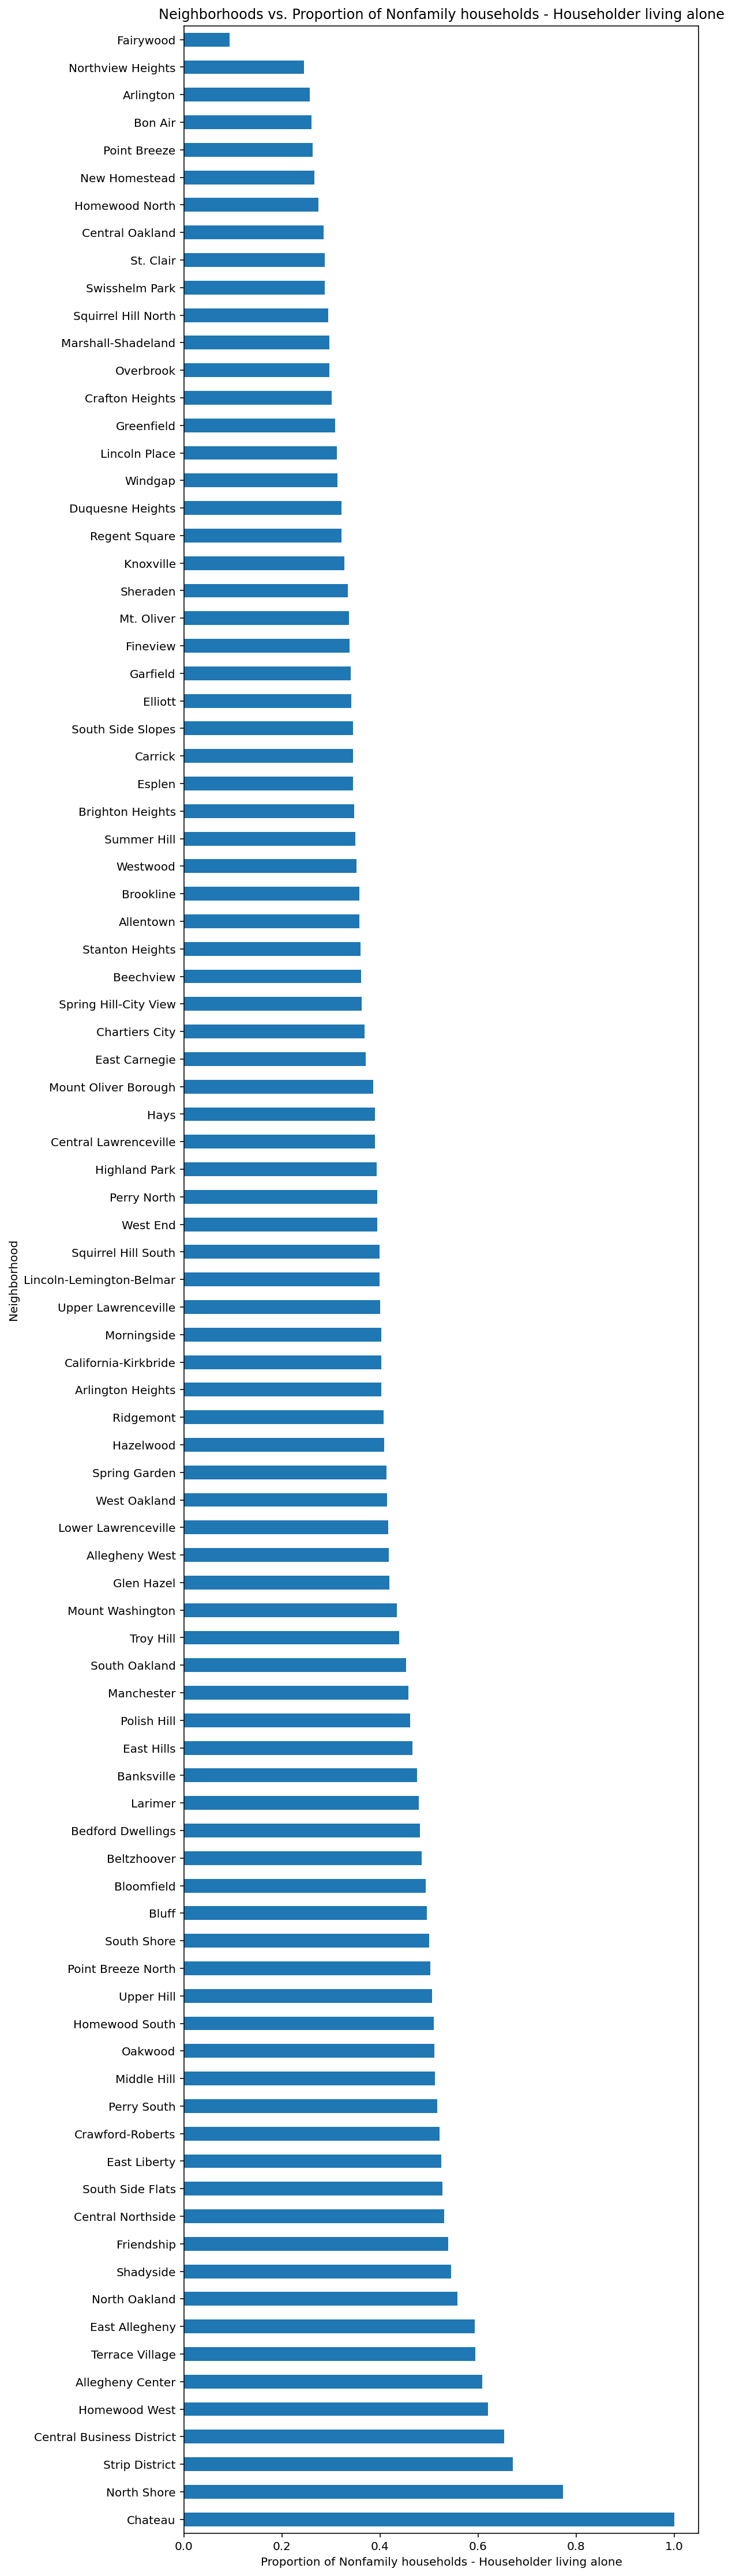

In [15]:

# Creation of bar graph to represent the data
prop_graph = pd.Series(prop, index=hoods).sort_values(ascending=False)
graph2 = prop_graph.plot.barh(x="Neighborhood",y='Estimate; Nonfamily households: - Householder living alone', legend=None)
graph2.set_xlabel("Proportion of Nonfamily households - Householder living alone")
graph2.set_ylabel("Neighborhood")
graph2.set_title("Neighborhoods vs. Proportion of Nonfamily households - Householder living alone")

plt.rcParams["figure.figsize"] = [8, 40]
%config InlineBackend.figure_format = 'retina'

This gives both a chart and bar graph representataion to more easily understand the data.

In [16]:
# Top 15 values by proportion
prop_graph.head(15)

Chateau                      1.000000
North Shore                  0.772727
Strip District               0.671154
Central Business District    0.653455
Homewood West                0.619898
Allegheny Center             0.608046
Terrace Village              0.594465
East Allegheny               0.592934
North Oakland                0.557537
Shadyside                    0.545163
Friendship                   0.539106
Central Northside            0.530764
South Side Flats             0.527333
East Liberty                 0.524466
Crawford-Roberts             0.521778
dtype: float64

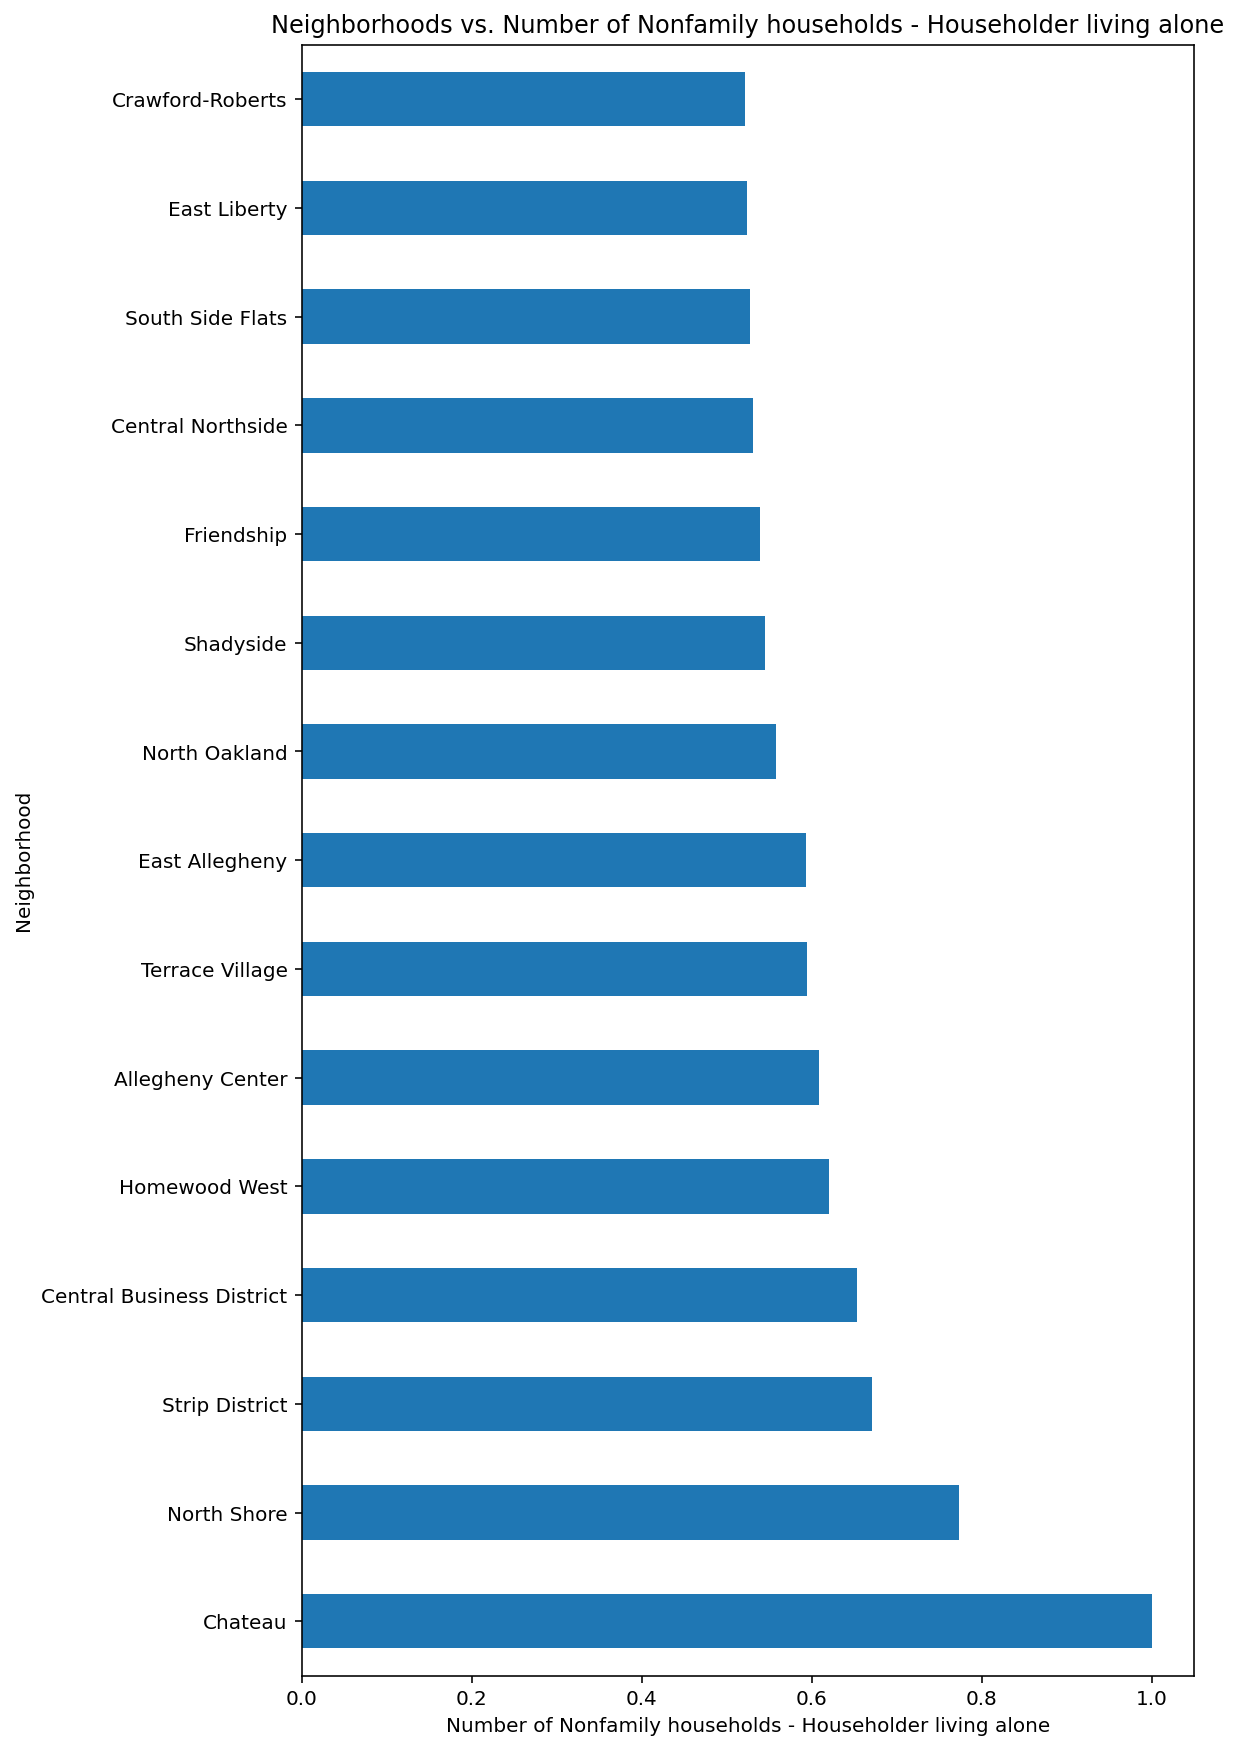

In [18]:

# Bar graph representation of top 15
graph3 = prop_graph.head(15).plot.barh()
graph3.set_xlabel("Number of Nonfamily households - Householder living alone")
graph3.set_ylabel("Neighborhood")
graph3.set_title("Neighborhoods vs. Number of Nonfamily households - Householder living alone")

plt.rcParams["figure.figsize"] = [8, 15]
%config InlineBackend.figure_format = 'retina'

And finally, I have filtered out the data down to the top 15 highest proportions, and created both bar and chart representations of this.

**Conclusion:**

Based off of the data for the proportion of nonfamily, lone households vs. total households in each neighborhood, the top five neighborhoods for us to rob are Chateau, North Shore, Strip District, Central Business District, and Homewood West. These give us the highest chance of a random house being unoccupied due to a predominately single householder area, and also give us the least likelihood of running into children and finding more valuable items.